In [ ]:
%matplotlib inline
!pip install category_encoders
!pip install joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
excel_file_path = "/content/drive/MyDrive/Colab Notebooks/NCKH_cleaned.xlsx"
df = pd.read_excel(excel_file_path)

In [ ]:
df_copy = df
df_copy.keys()


Index(['Cau1', 'Cau2', 'Cau3', 'Cau4', 'Cau5', 'Cau6', 'Cau7', 'Cau8', 'Cau9',
       'Cau10', 'Cau11', 'Cau12', 'Cau13', 'Cau14', 'Cau15', 'Cau16', 'Cau17',
       'Cau18', 'Cau19', 'Cau20', 'Cau21', 'Cau22', 'Cau23', 'Cau24', 'Cau24*',
       'Cau25', 'Cau26', 'Cau27', 'Cau28', 'Cau29', 'Cau30', 'Cau31', 'Cau32',
       'Cau33', 'Cau34', 'Cau35', 'Cau36', 'Cau37', 'Cau37*'],
      dtype='object')

# **`Ordinal Features`**

In [ ]:
#Replace the missing value with the mean value
mean_Cau3 = df_copy['Cau3'].mean()
df_copy['Cau3'].fillna(mean_Cau3, inplace=True)
df_copy['Cau3'] = df_copy["Cau3"].astype(int)
#Replace the missing value with "Unknow"
df_copy['Cau2'].fillna('Unknown', inplace=True)


In [ ]:
df_copy = df_copy.drop(columns = ['Cau13','Cau15','Cau16'], axis = 1)

In [ ]:
ordinal_categoricals = ["Cau1",'Cau2','Cau3','Cau5','Cau6',"Cau7",'Cau34']
enc = OrdinalEncoder()
df_copy[ordinal_categoricals]= enc.fit_transform(df_copy[ordinal_categoricals])


In [ ]:
pd.crosstab(df_copy['Cau9'],df_copy['Cau9'], normalize='all')*100


Cau9,0,1
Cau9,,
0,28.121354,0.000000
1,0.000000,71.878646


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 [Text(1, 0, 'Cau1'),
  Text(2, 0, 'Cau2'),
  Text(3, 0, 'Cau3'),
  Text(4, 0, 'Cau4'),
  Text(5, 0, 'Cau5'),
  Text(6, 0, 'Cau6'),
  Text(7, 0, 'Cau7'),
  Text(8, 0, 'Cau8'),
  Text(9, 0, 'Cau9'),
  Text(10, 0, 'Cau10'),
  Text(11, 0, 'Cau11'),
  Text(12, 0, 'Cau12'),
  Text(13, 0, 'Cau14'),
  Text(14, 0, 'Cau17'),
  Text(15, 0, 'Cau18'),
  Text(16, 0, 'Cau19'),
  Text(17, 0, 'Cau20'),
  Text(18, 0, 'Cau21'),
  Text(19, 0, 'Cau22'),
  Text(20, 0, 'Cau23'),
  Text(21, 0, 'Cau24'),
  Text(22, 0, 'Cau24*'),
  Text(23, 0, 'Cau25'),
  Text(24, 0, 'Cau26'),
  Text(25, 0, 'Cau27'),
  Text(26, 0, 'Cau28'),
  Text(27, 0, 'Cau29'),
  Text(28, 0, 'Cau30'),
  Text(29, 0, 'Cau31'),
  Text(30, 0, 'Cau32'),
  Text(31, 0, 'Cau33'),
  Text(32, 0, 'Cau34'),
  Text(33, 0, 'Cau35'),
  Text(34, 0, 'Cau36')])

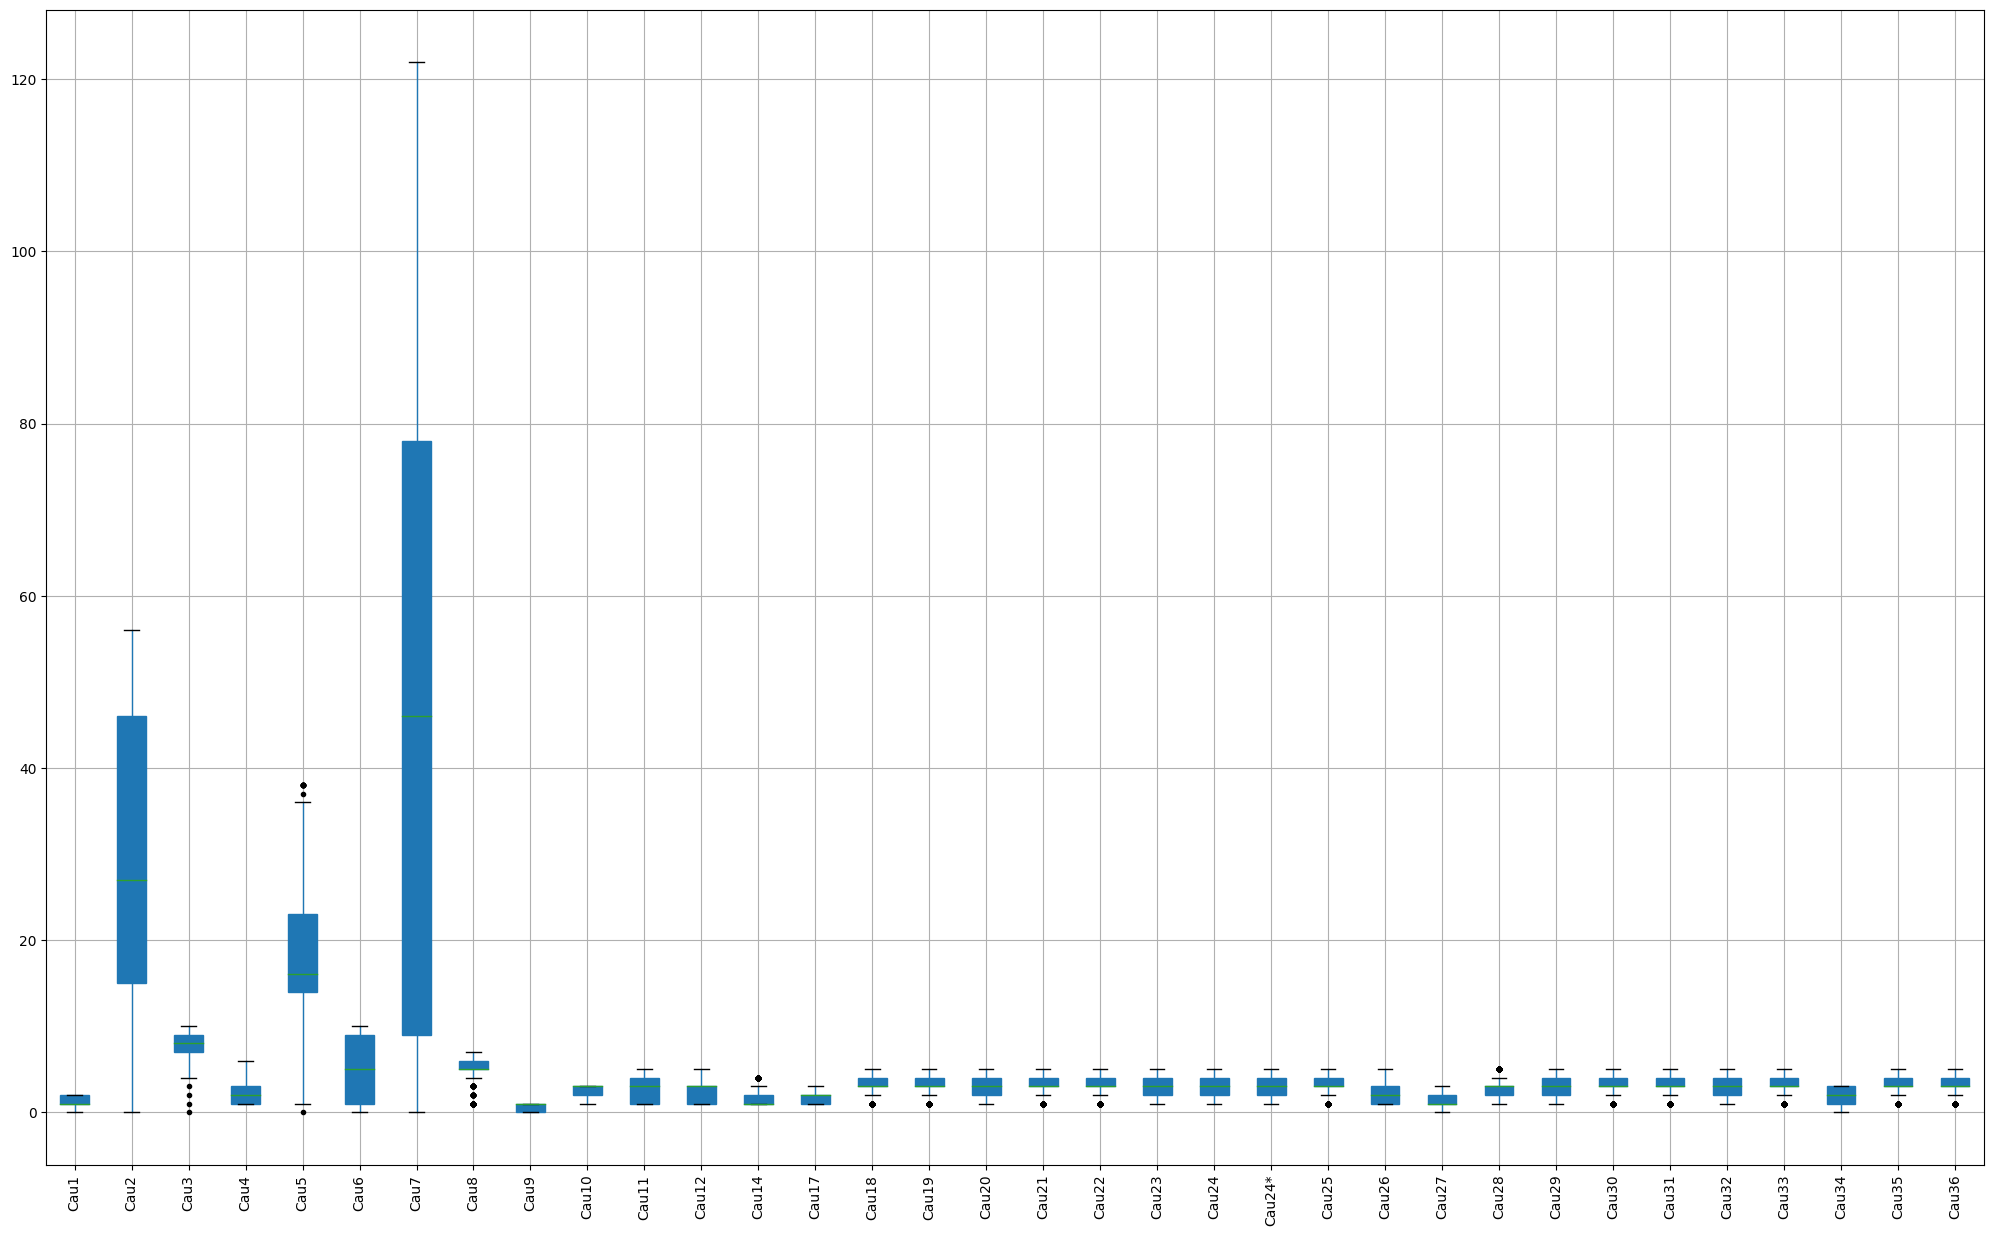

In [ ]:
plt.subplots(figsize=(25,15))
df_copy.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [ ]:

# Hàm để đưa outlier về max hoặc min
def handle_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Đưa outlier về giá trị max nếu nằm phía trên của boxplot
    column[column > upper_bound] = upper_bound

    # Đưa outlier về giá trị min nếu nằm phía dưới của boxplot
    column[column < lower_bound] = lower_bound

# Áp dụng hàm cho từng cột 'Cau1', 'Cau2', 'Cau3', 'Cau4'
for col in ['Cau3', 'Cau5', 'Cau8', 'Cau14', 'Cau18', 'Cau19', 'Cau21', 'Cau22', 'Cau25', 'Cau28', 'Cau30', 'Cau31', 'Cau33', 'Cau35', 'Cau36']:
    handle_outliers(df_copy[col])

# In ra DataFrame sau khi xử lý
print(df_copy)


     Cau1  Cau2  Cau3  Cau4  Cau5  Cau6   Cau7  Cau8  Cau9  Cau10  ...  Cau29  \
0     2.0  42.0   8.0     2   9.0   0.0    6.0   5.0     1      3  ...      3   
1     1.0  34.0   6.0     4   9.0   0.0    6.0   5.0     1      3  ...      5   
2     1.0  42.0   8.0     2   9.0   0.0   19.0   6.0     1      3  ...      5   
3     1.0  45.0   8.0     2   9.0   0.0    6.0   3.5     1      3  ...      3   
4     1.0  23.0   8.0     2  10.0   6.0   57.0   5.0     1      3  ...      3   
..    ...   ...   ...   ...   ...   ...    ...   ...   ...    ...  ...    ...   
852   1.0   6.0   9.0     2  28.0   5.0   46.0   5.0     1      2  ...      3   
853   1.0  53.0   9.0     2  14.0   4.0    5.0   5.0     1      3  ...      3   
854   2.0   0.0   8.0     3  15.0   6.0  116.0   6.0     1      2  ...      5   
855   1.0  53.0   9.0     1   9.0   0.0    6.0   3.5     0      2  ...      1   
856   2.0  29.0   8.0     3  15.0   6.0  106.0   5.0     0      2  ...      1   

     Cau30  Cau31  Cau32  C

<ipython-input-11-fb20dc070b88>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_bound] = upper_bound
<ipython-input-11-fb20dc070b88>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_bound] = lower_bound
<ipython-input-11-fb20dc070b88>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_bound] = upper_bound
<ipython-input-11-fb20dc070b88>:13: SettingWithCopyWarning: 
A v

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 [Text(1, 0, 'Cau1'),
  Text(2, 0, 'Cau2'),
  Text(3, 0, 'Cau3'),
  Text(4, 0, 'Cau4'),
  Text(5, 0, 'Cau5'),
  Text(6, 0, 'Cau6'),
  Text(7, 0, 'Cau7'),
  Text(8, 0, 'Cau8'),
  Text(9, 0, 'Cau9'),
  Text(10, 0, 'Cau10'),
  Text(11, 0, 'Cau11'),
  Text(12, 0, 'Cau12'),
  Text(13, 0, 'Cau14'),
  Text(14, 0, 'Cau17'),
  Text(15, 0, 'Cau18'),
  Text(16, 0, 'Cau19'),
  Text(17, 0, 'Cau20'),
  Text(18, 0, 'Cau21'),
  Text(19, 0, 'Cau22'),
  Text(20, 0, 'Cau23'),
  Text(21, 0, 'Cau24'),
  Text(22, 0, 'Cau24*'),
  Text(23, 0, 'Cau25'),
  Text(24, 0, 'Cau26'),
  Text(25, 0, 'Cau27'),
  Text(26, 0, 'Cau28'),
  Text(27, 0, 'Cau29'),
  Text(28, 0, 'Cau30'),
  Text(29, 0, 'Cau31'),
  Text(30, 0, 'Cau32'),
  Text(31, 0, 'Cau33'),
  Text(32, 0, 'Cau34'),
  Text(33, 0, 'Cau35'),
  Text(34, 0, 'Cau36')])

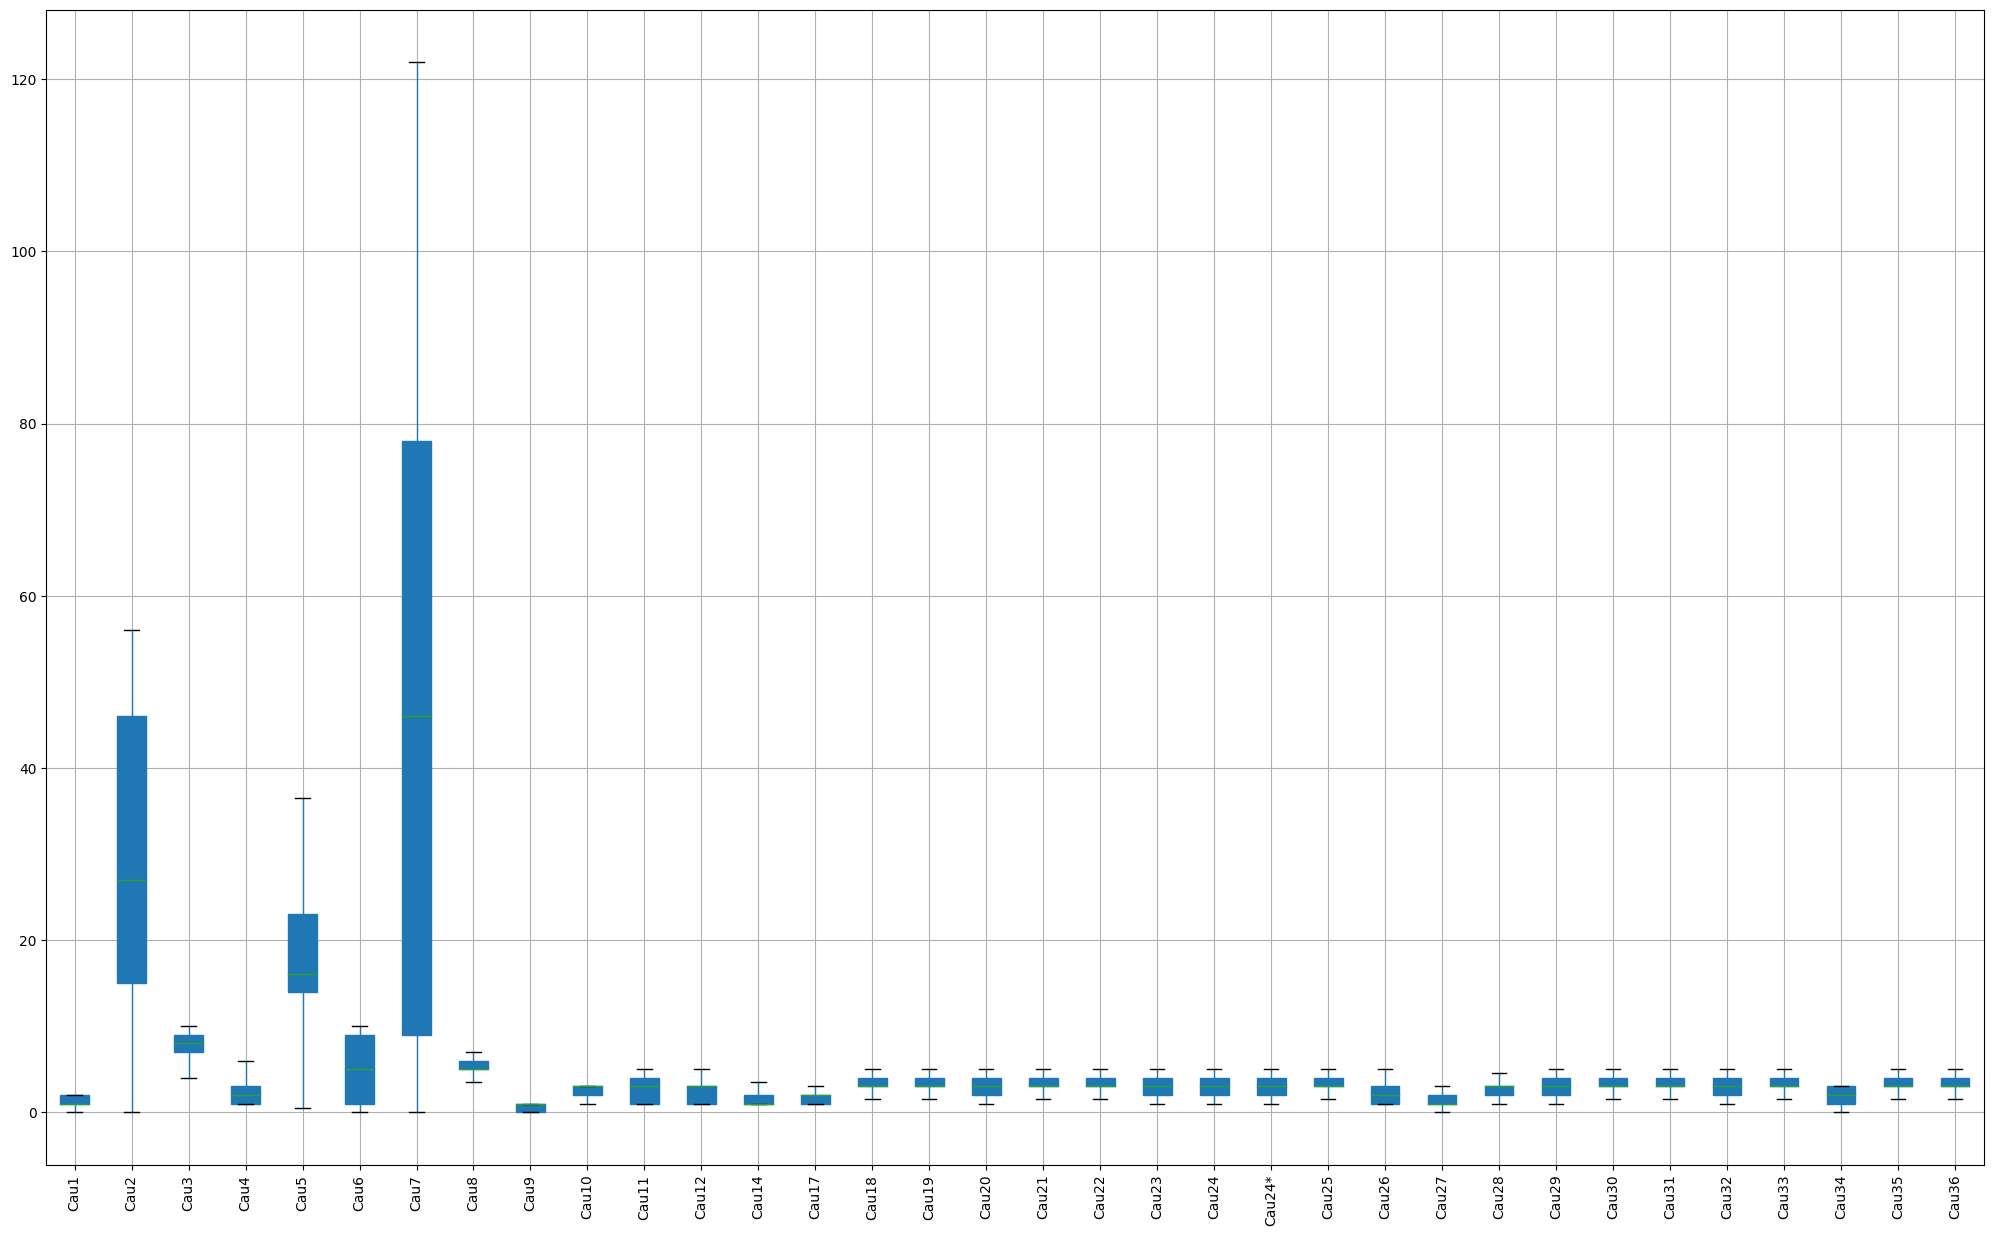

In [ ]:
plt.subplots(figsize=(25,15))
df_copy.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [ ]:
target = df_copy['Cau9']
inputs = df_copy.drop(['Cau9','Cau37','Cau37*'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=42)

In [ ]:
train_class_counts = pd.Series(y_train).value_counts()

# Đếm số lượng các lớp trong y_test
test_class_counts = pd.Series(y_test).value_counts()

# In kết quả
print("Train Class Counts:")
print(train_class_counts)

print("\nTest Class Counts:")
print(test_class_counts)

Train Class Counts:
1    454
0    188
Name: Cau9, dtype: int64

Test Class Counts:
1    162
0     53
Name: Cau9, dtype: int64


# ***`Normalization`***

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [ ]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.019053,0.689213,0.759792,-0.269834,-0.062794,1.265295,-0.688167,0.908773,0.582147,-0.530733,...,-1.400403,-0.675678,-0.034073,-1.274896,-1.230844,0.047789,0.849119,-0.535355,-0.347633,0.588464
1,-0.834295,-0.809920,-0.868877,0.661529,1.342766,0.072900,-0.082681,-1.643424,0.582147,1.730753,...,1.090065,1.212397,0.807276,-0.224885,-0.093863,0.047789,-0.241150,-1.329114,1.610089,0.588464
2,-0.834295,-1.155873,-0.054543,0.661529,-0.701686,1.265295,0.897631,-1.132985,0.582147,-0.530733,...,2.335299,-1.619716,1.648626,-0.224885,-0.093863,1.965327,-0.241150,1.052164,-1.326494,-1.286443
3,-2.687644,-1.328850,0.759792,-0.269834,2.428881,0.072900,-0.226844,-0.112106,-0.855308,0.223096,...,-0.155169,-0.675678,-1.716773,-1.799902,-0.093863,0.047789,-1.876553,-1.329114,-1.326494,-1.286443
4,-0.834295,-0.118012,1.574127,-1.201196,-0.318351,0.370999,1.877943,0.908773,-0.855308,-1.284561,...,-0.155169,-0.675678,-0.875423,-0.224885,-0.093863,0.047789,-0.241150,-0.535355,-0.347633,-0.348990


In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


# ***`Random Forest`***

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_scaled, y_train)

<ipython-input-94-c5598e41692a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [ ]:
expected = y_test
predicted = RF_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_RF= metrics.confusion_matrix(expected, predicted)
print(cm_RF)

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        53
           1       0.90      0.88      0.89       162

    accuracy                           0.84       215
   macro avg       0.78      0.79      0.78       215
weighted avg       0.84      0.84      0.84       215

[[ 37  16]
 [ 19 143]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/RF_classifier.pkl', 'wb') as file:
    pickle.dump(RF_classifier, file)

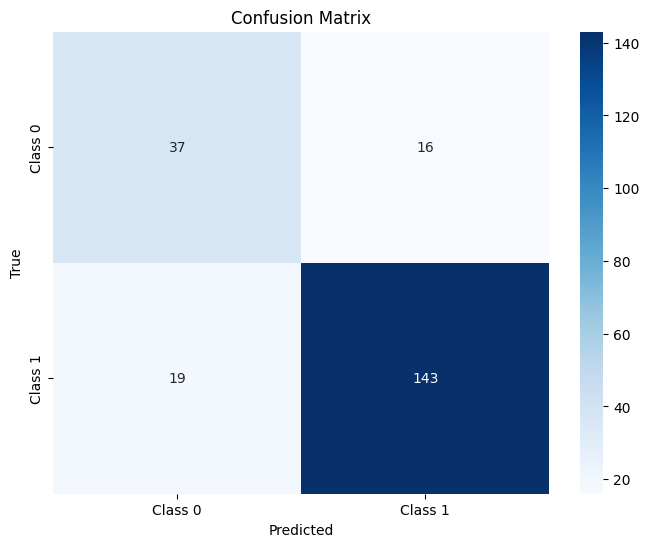

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.875


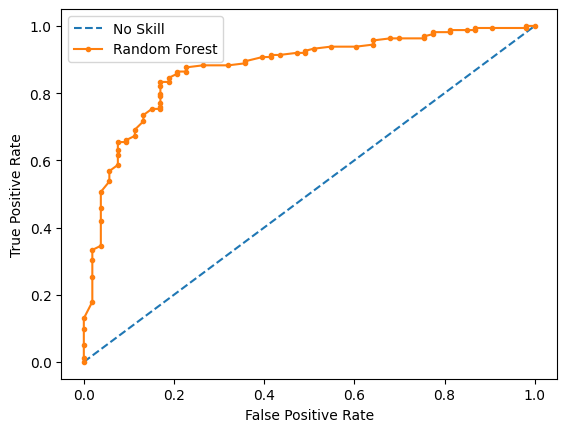

In [ ]:
# generate a no skill (ns) prediction and random forest (rf) predictions.
ns_probs = [0 for i in range(len(y_test))]
rf_probs = RF_classifier.predict_proba(X_test_scaled)[:,1]
# calculating scores for no skill and random forest
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ***`Grid Search RF `***

Sau khi tuning sử dụng ballance sampling thì cũng thế so với khi chưa tuning

In [ ]:

param_grid = {
    'n_estimators': [10,25,30,50,100,200],
    'max_depth': [2,3,5,10,20],
    'criterion':['entropy','gini'],
    'min_samples_leaf': [5,10,20,50,100,200],
    'min_samples_split': [2, 5, 10],
}

# Tạo đối tượng GridSearchCV
grid_search_RF = GridSearchCV(estimator=RF_classifier,
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv = 5,
                           verbose=1,
                           scoring="accuracy")

grid_search_RF.fit(X_train_scaled, y_train)
grid_search_RF.best_estimator_


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=200)

In [ ]:
expected = y_test
predicted = grid_search_RF.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        53
           1       0.90      0.90      0.90       162

    accuracy                           0.85       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.85      0.85      0.85       215

[[ 37  16]
 [ 16 146]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_RF.pkl', 'wb') as file:
    pickle.dump(grid_search_RF, file)

In [ ]:
importances_Grid_Search_RF = grid_search_RF.best_estimator_.feature_importances_
importances_Grid_Search_RF


array([0.00804863, 0.03364389, 0.01664552, 0.01578103, 0.02960292,
       0.02243568, 0.03578412, 0.02440044, 0.02165383, 0.23471304,
       0.1065867 , 0.01899001, 0.07204778, 0.013718  , 0.01410804,
       0.03645574, 0.02344201, 0.00964513, 0.011816  , 0.0190552 ,
       0.01095117, 0.01866946, 0.01557534, 0.02644826, 0.01186312,
       0.00983948, 0.02129094, 0.01462709, 0.01242068, 0.02945026,
       0.01739864, 0.01118567, 0.03170619])

In [ ]:
FIM_Grid_Search_RF = pd.DataFrame({'Features': X_train_scaled.columns , 'Feature_importance':importances_Grid_Search_RF})
FIM_Grid_Search_RF = FIM_Grid_Search_RF.sort_values(by=['Feature_importance'])
FIM_Grid_Search_RF


,Features,Feature_importance
0,0,0.008049
17,17,0.009645
25,25,0.009839
20,20,0.010951
31,31,0.011186
18,18,0.011816
24,24,0.011863
28,28,0.012421
13,13,0.013718
14,14,0.014108


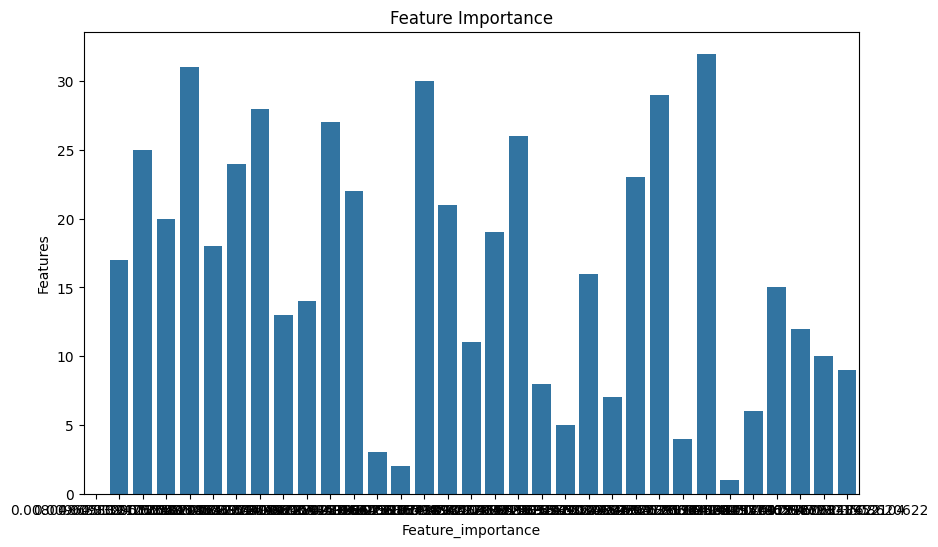

In [ ]:
  plt.figure(figsize=(10,6))
  plt.title('Feature Importance')
  sns.barplot(y='Features', x='Feature_importance', data=FIM_Grid_Search_RF)
  plt.show()

--------------------------------------


# ***`Logistic Regression`***

In [ ]:
pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=0ea458a12603156a93b282ac39eeef03f543981fa4157f7589b4beb3aee653bc
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [ ]:
from sklearn.linear_model import LogisticRegression

# Tạo và huấn luyện mô hình Logistic Regression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)

expected = y_test
predicted = LR_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_LR= metrics.confusion_matrix(expected, predicted)
print(cm_LR)


              precision    recall  f1-score   support

           0       0.69      0.64      0.67        53
           1       0.89      0.91      0.90       162

    accuracy                           0.84       215
   macro avg       0.79      0.77      0.78       215
weighted avg       0.84      0.84      0.84       215

[[ 34  19]
 [ 15 147]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/LR_model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

In [ ]:
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(estimator=LR_model, param_grid=param_grid_LR, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_LR.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_LR.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_LR.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_LR.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 84.89%
Test Accuracy: 85.12%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
expected = y_test
predicted = grid_search_LR.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        53
           1       0.90      0.91      0.90       162

    accuracy                           0.85       215
   macro avg       0.80      0.79      0.80       215
weighted avg       0.85      0.85      0.85       215

[[ 36  17]
 [ 15 147]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_LR.pkl', 'wb') as file:
    pickle.dump(grid_search_LR, file)

In [ ]:
# Assume model is your trained Ordinal Logistic Regression model
coefficients = model_LR.coef_[0]
print(coefficients)


[ 4.57358278e-03 -4.41570470e-04 -3.78486188e-01 -2.16270593e-01
  1.13145719e-02  3.97799523e-02 -1.19714273e-03 -5.42820415e-02
  1.21741280e-01  1.02586590e+00  1.95687936e-01  5.77990427e-02
  6.97662343e-01 -1.77918139e-01 -4.70027010e-02  2.48128504e-01
  2.35644794e-01 -1.67559874e-01 -3.51389896e-01  1.40014914e-01
  1.51779563e-01 -4.04386743e-02 -1.35277708e-01  2.55056187e-01
 -3.11150993e-01 -1.83545790e-01  1.67942476e-01 -1.10342351e-01
 -8.28366632e-02  3.11601677e-01  1.07502472e-01 -1.38656112e-01
  3.95044933e-01]


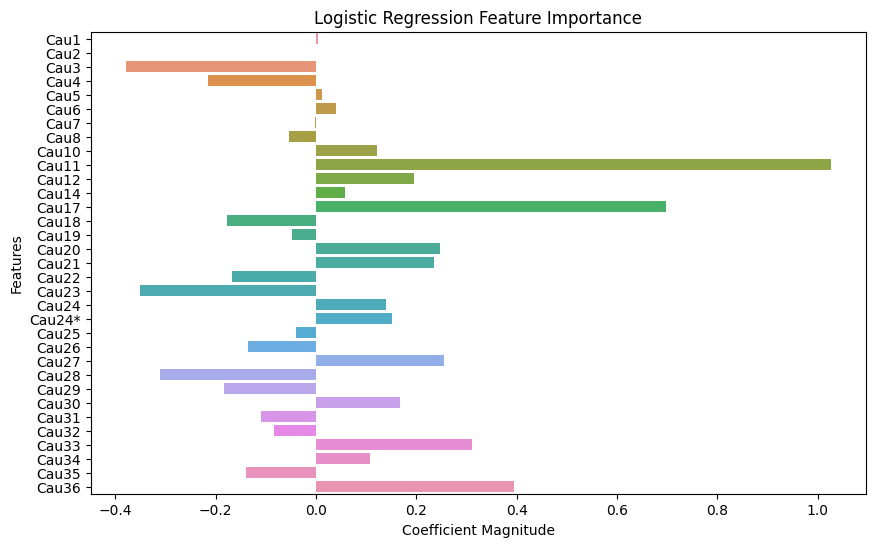

In [ ]:

feature_names = X_resampled.columns  # Assuming you have named columns in your dataset

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()


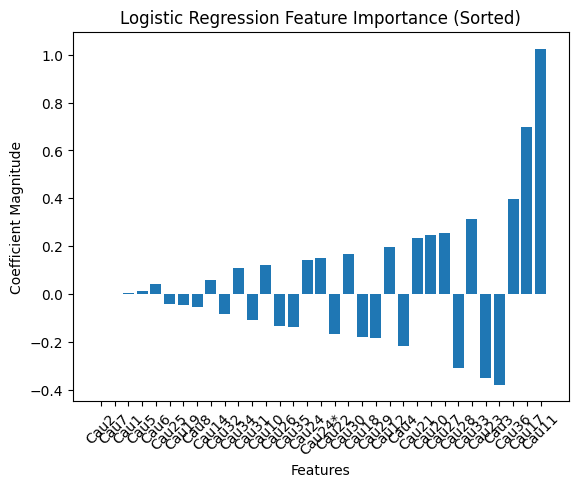

In [ ]:

# Get the indices that would sort the feature importances
sorted_indices = np.argsort(np.abs(coefficients))

# Sort the features and importances accordingly
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importance = coefficients[sorted_indices]

# Plot the sorted feature importance
plt.bar(sorted_features, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Logistic Regression Feature Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()



# **`SVM`**

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/svm_classifier.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)

In [ ]:
expected = y_test
predicted = svm_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        53
           1       0.88      0.90      0.89       162

    accuracy                           0.84       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.83      0.84      0.84       215

[[ 34  19]
 [ 16 146]]


In [ ]:
param_grid_SVM = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_SVM, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_SVM.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_SVM.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_SVM.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_SVM.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 85.52%
Test Accuracy: 83.72%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
expected = y_test
predicted = grid_search_SVM.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        53
           1       0.88      0.90      0.89       162

    accuracy                           0.84       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.83      0.84      0.84       215

[[ 34  19]
 [ 16 146]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_SVM.pkl', 'wb') as file:
    pickle.dump(grid_search_SVM, file)

# ***`RFE`***


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import numpy as np

rfe = RFE(estimator=svm_classifier, n_features_to_select=10)

X_rfe = rfe.fit_transform(X_train, y_train)

selected_features = np.array(X_train.columns)[rfe.support_]

print("Các đặc trưng quan trọng sau khi sử dụng RFE:")
print(selected_features)


Các đặc trưng quan trọng sau khi sử dụng RFE:
['Cau11' 'Cau12' 'Cau17' 'Cau20' 'Cau23' 'Cau28' 'Cau30' 'Cau33' 'Cau35'
 'Cau36']


# ***`[KNN]`***

In [ ]:
# Define the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
expected = y_test
predicted = knn_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        53
           1       0.88      0.88      0.88       162

    accuracy                           0.81       215
   macro avg       0.75      0.75      0.75       215
weighted avg       0.81      0.81      0.81       215

[[ 33  20]
 [ 20 142]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [ ]:
# Set up the parameter grid for the grid search
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the GridSearchCV object
grid_search_KNN = GridSearchCV(estimator=knn_model, param_grid=param_grid_KNN, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_KNN.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_KNN.best_params_)

Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
expected = y_test
predicted = grid_search_KNN.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        53
           1       0.87      0.88      0.87       162

    accuracy                           0.81       215
   macro avg       0.74      0.73      0.74       215
weighted avg       0.81      0.81      0.81       215

[[ 31  22]
 [ 19 143]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_KNN.pkl', 'wb') as file:
    pickle.dump(grid_search_KNN, file)

# ***`XGBoost`***

In [ ]:
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
expected = y_test
predicted = xgb_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        53
           1       0.89      0.89      0.89       162

    accuracy                           0.83       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.83      0.83      0.83       215

[[ 35  18]
 [ 18 144]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [ ]:

# Set up the parameter grid for the grid search
param_grid_sbg = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_sbg, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_xgb.best_params_)


Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
expected = y_test
predicted = grid_search_xgb.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69        53
           1       0.90      0.89      0.89       162

    accuracy                           0.84       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.84      0.84      0.84       215

[[ 37  16]
 [ 18 144]]


In [ ]:
# Lưu model vào file pickle
with open('/content/drive/MyDrive/Colab Notebooks/grid_search_xgb.pkl', 'wb') as file:
    pickle.dump(grid_search_xgb, file)